## Data Cleaning

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

pd.options.display.float_format = '{:.2f}'.format # Set it to convert scientific notations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns

np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})

import os

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [4]:
df = pd.read_csv("data/loan.csv")

/Users/liuriguang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.shape

(887379, 74)

In [6]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.00,5000.00,4975.00,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.00,Jan-1985,1.00,nan,nan,3.00,0.00,13648.00,83.70,9.00,f,0.00,0.00,5861.07,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.00,nan,1.00,INDIVIDUAL,nan,nan,NaN,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1077430,1314167,2500.00,2500.00,2500.00,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.00,Apr-1999,5.00,nan,nan,3.00,0.00,1687.00,9.40,4.00,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.00,nan,1.00,INDIVIDUAL,nan,nan,NaN,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


### Remove columns which contain more than 30% NA values

In [7]:
# Remove columns which contain more than 30% NA values because it is hard to fill those missing values
nulls = df.isnull().sum()
null_cols = nulls[nulls.values > df.shape[0]*0.3]
null_col_names = list(null_cols.index)
df.drop(labels=null_col_names,axis=1,inplace=True)

In [8]:
df.shape

(887379, 53)

### Remove columns where number of unique value is only 1

In [9]:
unique = df.nunique()
unique_single_value = unique[unique.values == 1]
df.drop(labels=unique_single_value.index,axis=1,inplace=True)
df.shape

(887379, 52)

### Remove irrelevant columns

In [10]:
irrelevant_columns = ["id",
                      "member_id",
                      "url",
                      "zip_code",
                      "issue_d",
                      "last_pymnt_d",
                      "next_pymnt_d",
                      "earliest_cr_line",
                      "last_credit_pull_d"]
df.drop(labels=irrelevant_columns,axis=1,inplace=True)
df.shape

(887379, 43)

In [11]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.00,5000.00,4975.00,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Fully Paid,n,credit_card,Computer,AZ,27.65,0.00,1.00,3.00,0.00,13648.00,83.70,9.00,f,0.00,0.00,5861.07,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.00,INDIVIDUAL,0.00,nan,nan,nan
1,2500.00,2500.00,2500.00,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Charged Off,n,car,bike,GA,1.00,0.00,5.00,3.00,0.00,1687.00,9.40,4.00,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.00,INDIVIDUAL,0.00,nan,nan,nan
2,2400.00,2400.00,2400.00,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Fully Paid,n,small_business,real estate business,IL,8.72,0.00,2.00,2.00,0.00,2956.00,98.50,10.00,f,0.00,0.00,3003.65,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.00,INDIVIDUAL,0.00,nan,nan,nan
3,10000.00,10000.00,10000.00,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Fully Paid,n,other,personel,CA,20.00,0.00,1.00,10.00,0.00,5598.00,21.00,37.00,f,0.00,0.00,12226.30,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.00,INDIVIDUAL,0.00,nan,nan,nan
4,3000.00,3000.00,3000.00,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Current,n,other,Personal,OR,17.94,0.00,0.00,15.00,0.00,27783.00,53.90,38.00,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.00,INDIVIDUAL,0.00,nan,nan,nan


### Remove deterministic columns. It makes no sense to predict if a loan is delinquent or not given its current payment status. However, these columns are really critical in cost analysis.

In [12]:
det_columns = [
#                "delinq_2yrs",
#                "total_rev_hi_lim",
#                "acc_now_delinq",
               "last_pymnt_amnt",
               "total_rec_late_fee",
               "total_rec_int",
               "total_rec_prncp",
               "total_pymnt_inv",
               "total_pymnt",
               "out_prncp_inv",
               "out_prncp",
               "initial_list_status"
              ]
df.drop(labels=det_columns,axis=1,inplace=True)
df.shape

(887379, 34)

### Remove intercorrelated columns

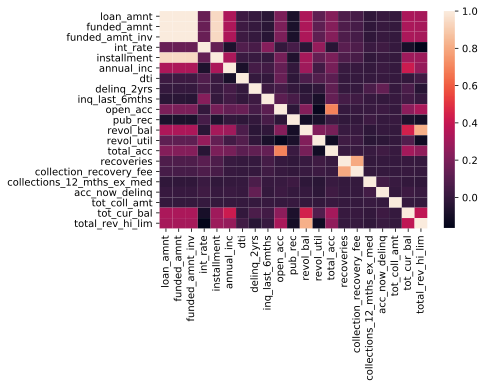

In [13]:
sns.heatmap(df.corr());

In [14]:
columns = ["funded_amnt","funded_amnt_inv","installment"]
df.drop(labels=columns,axis=1,inplace=True)
df.shape

(887379, 31)

### Remove rows which contain null values

In [15]:
df.dropna(inplace=True)
df.shape

(769174, 31)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769174 entries, 42535 to 887378
Data columns (total 31 columns):
loan_amnt                     769174 non-null float64
term                          769174 non-null object
int_rate                      769174 non-null float64
grade                         769174 non-null object
sub_grade                     769174 non-null object
emp_title                     769174 non-null object
emp_length                    769174 non-null object
home_ownership                769174 non-null object
annual_inc                    769174 non-null float64
verification_status           769174 non-null object
loan_status                   769174 non-null object
pymnt_plan                    769174 non-null object
purpose                       769174 non-null object
title                         769174 non-null object
addr_state                    769174 non-null object
dti                           769174 non-null float64
delinq_2yrs                   769

In [17]:
df.title.head(5)

42535    Debt Consolidation
42536      Debt Consilation
42537        UNIVERSAL CARD
42538    Debt consolidation
42539               Pay off
Name: title, dtype: object

In [18]:
# This column seems useless.
df.drop("title",axis=1,inplace=True)
df.shape

(769174, 30)

### Feature Engineering

In [19]:
df.emp_title.str.lower().value_counts()

teacher                               16597
manager                               14953
owner                                  8567
registered nurse                       7718
supervisor                             6931
driver                                 6206
sales                                  6199
rn                                     6012
office manager                         4684
project manager                        4622
general manager                        4254
truck driver                           3562
director                               3425
engineer                               3183
president                              3089
sales manager                          2710
vice president                         2630
police officer                         2598
operations manager                     2590
store manager                          2464
attorney                               2384
accountant                             2350
administrative assistant        

In [20]:
df.emp_title.str.lower().str.contains("executive|owner|founder|vp|president").sum()

35635

In [21]:
# extract executive level borrowers
df["executive"] = 0
exe = df.emp_title.str.lower().str.contains("executive|owner|founder|president")
vp = df.emp_title.str.contains("VP")
df.loc[exe | vp,"executive"] = 1
df.executive.value_counts()

0    733890
1     35284
Name: executive, dtype: int64

In [22]:
df.emp_title.str.lower().str.contains("senior|officer|manager|director|supervisor").sum()

187736

In [23]:
# extract senior level borrowers
df["senior"] = 0
senior = df.emp_title.str.lower().str.contains("senior|officer|manager|director|supervisor")
df.loc[senior,"senior"] = 1
df.senior.value_counts()

0    581438
1    187736
Name: senior, dtype: int64

In [24]:
df.drop("emp_title",axis=1,inplace=True)

In [25]:
# Convert years of employment into a numeric variable
df["emp_length_yrs"]= 0

temp = df["emp_length"] == "< 1 year"
df.loc[temp,"emp_length_yrs"] = 0

temp = df["emp_length"] == "1 year"
df.loc[temp,"emp_length_yrs"] = 1

temp = df.emp_length == "10+ years"
df.loc[temp,"emp_length_yrs"] = 10

for i in range(2,10):
    temp = df.emp_length == f"{i} years"
    df.loc[temp,"emp_length_yrs"] = i

In [26]:
df.emp_length_yrs.value_counts()

10    272330
2      71251
3      63188
0      62965
1      51439
5      49396
4      46350
8      40916
7      40871
6      38332
9      32136
Name: emp_length_yrs, dtype: int64

In [27]:
df.drop("emp_length",axis=1,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769174 entries, 42535 to 887378
Data columns (total 31 columns):
loan_amnt                     769174 non-null float64
term                          769174 non-null object
int_rate                      769174 non-null float64
grade                         769174 non-null object
sub_grade                     769174 non-null object
home_ownership                769174 non-null object
annual_inc                    769174 non-null float64
verification_status           769174 non-null object
loan_status                   769174 non-null object
pymnt_plan                    769174 non-null object
purpose                       769174 non-null object
addr_state                    769174 non-null object
dti                           769174 non-null float64
delinq_2yrs                   769174 non-null float64
inq_last_6mths                769174 non-null float64
open_acc                      769174 non-null float64
pub_rec                       

In [29]:
# Convert term into a numeric variable
df["term_yrs"] = df.term.str.extract('(\d\d)')
df["term_yrs"] = pd.to_numeric(df.term_yrs)/12
df.drop("term",axis=1,inplace=True)

In [30]:
# Do not consider states now
df_new = df.drop("addr_state",axis=1)

In [31]:
df_new.loan_status.value_counts()

Current               562459
Fully Paid            146546
Charged Off            32582
Late (31-120 days)     10675
Issued                  7707
In Grace Period         5917
Late (16-30 days)       2167
Default                 1121
Name: loan_status, dtype: int64

In [32]:
uncertain = df_new["loan_status"].isin(["Current","Issued"])
df_new.drop(df_new[uncertain].index, axis=0, inplace=True)
df_new.reset_index(drop=True,inplace=True)
df_new.shape

(199008, 30)

In [33]:
good = ["Fully Paid"]
df_new.loc[df_new.loan_status.isin(good), "loan_status"] = "Good"
df_new.loc[df_new.loan_status != "Good", "loan_status"] = "Bad"

In [34]:
df_new.loan_status.value_counts()

Good    146546
Bad      52462
Name: loan_status, dtype: int64

([<matplotlib.patches.Wedge at 0x1ab8636be0>,
 [Text(-0.74384,0.810371,'Good'), Text(0.74384,-0.810371,'Bad')],
 [Text(-0.405731,0.442021,'73.64%'), Text(0.405731,-0.442021,'26.36%')])

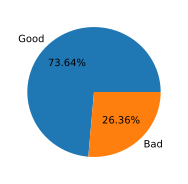

In [35]:
m = df_new.loan_status.value_counts()
plt.figure(figsize=[3,3])
plt.pie(m,labels=["Good","Bad"],autopct=lambda m :f'{m:.2f}%')

In [36]:
# Create a bad/good loans indicator feature
df_new["bad_loan"] = np.where((df_new.loan_status == "Bad"),1,0)
df_new.drop("loan_status",axis=1,inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199008 entries, 0 to 199007
Data columns (total 30 columns):
loan_amnt                     199008 non-null float64
int_rate                      199008 non-null float64
grade                         199008 non-null object
sub_grade                     199008 non-null object
home_ownership                199008 non-null object
annual_inc                    199008 non-null float64
verification_status           199008 non-null object
pymnt_plan                    199008 non-null object
purpose                       199008 non-null object
dti                           199008 non-null float64
delinq_2yrs                   199008 non-null float64
inq_last_6mths                199008 non-null float64
open_acc                      199008 non-null float64
pub_rec                       199008 non-null float64
revol_bal                     199008 non-null float64
revol_util                    199008 non-null float64
total_acc                     1

In [37]:
df_corr = df_new.loc[:,["bad_loan","delinq_2yrs","acc_now_delinq","total_rev_hi_lim"]]

In [38]:
df_corr.head()

,bad_loan,delinq_2yrs,acc_now_delinq,total_rev_hi_lim
0,0,0.00,0.00,8100.00
1,0,0.00,0.00,5300.00
2,0,0.00,0.00,54200.00
3,0,0.00,0.00,28200.00
4,1,0.00,0.00,20800.00


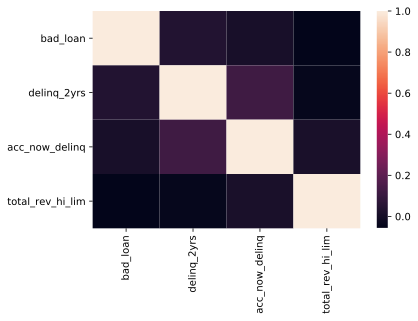

In [39]:
sns.heatmap(df_corr.corr())

In [40]:
# Hot encode some categorical variables
columns = ["grade", "sub_grade", "home_ownership", "purpose",
          "verification_status","pymnt_plan","application_type"]
for col in columns:
    temp = pd.get_dummies(df_new[col], prefix=col)
    df_new = pd.concat((df_new, temp),axis=1)

In [41]:
df_new.shape

(199008, 98)

In [42]:
df_new.drop(columns,axis=1,inplace=True)
df_new.shape

(199008, 91)

In [43]:
df_new.reset_index(drop=True,inplace=True)
df_new.shape

(199008, 91)

#### Because the original dataset is quite large, for computational efficiency, I pick up a sample dataset of 20,000 data points to build up and compare models.

In [44]:
df_test = df_new.sample(10000, random_state=42)

In [45]:
df_test.to_csv('data/sample_loan.csv')

In [46]:
df_test.shape

(10000, 91)

In [47]:
df_test.sample(5)

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,executive,senior,emp_length_yrs,term_yrs,bad_loan,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,application_type_INDIVIDUAL,application_type_JOINT
94725,31450.00,20.99,63000.00,31.96,0.00,0.00,13.00,0.00,20590.00,56.40,28.00,0.00,0.00,0.00,0.00,0.00,230760.00,36500.00,0,0,10,5.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
29718,15450.00,12.35,60000.00,4.18,0.00,0.00,7.00,0.00,6724.00,27.40,12.00,0.00,0.00,0.00,0.00,0.00,6724.00,24533.00,0,0,3,3.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0
96343,14000.00,21.99,50000.00,6.41,0.00,2.00,7.00,0.00,1104.00,10.50,20.00,0.00,0.00,0.00,0.00,0.00,83563.00,10500.00,0,0,6,5.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0
85570,9600.00,12.12,30000.00,19.96,2.00,0.00,6.00,0.00,457.00,10.20,22.00,512.95,5.04,0.00,0.00,0.00,96942.00,4500.00,0,0,0,3.00,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
66621,4450.00,14.09,35000.00,27.72,0.00,0.00,13.00,0.00,13964.00,79.80,25.00,0.00,0.00,0.00,0.00,0.00,139207.00,17500.00,0,0,10,3.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0


#### Define dependent and independent variables.

In [48]:
y = df_test.bad_loan
X = df_test.drop("bad_loan",axis=1)

In [49]:
y.head()

163422    0
109736    1
77162     0
180419    1
160695    0
Name: bad_loan, dtype: int64

In [50]:
X.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,executive,senior,emp_length_yrs,term_yrs,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,application_type_INDIVIDUAL,application_type_JOINT
163422,5000.00,6.62,52967.88,15.56,0.00,2.00,8.00,0.00,5129.00,19.60,17.00,0.00,0.00,0.00,0.00,0.00,225290.00,26200.00,0,0,2,3.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
109736,4450.00,20.20,42500.00,30.53,2.00,4.00,8.00,0.00,3739.00,49.40,13.00,0.00,0.00,0.00,0.00,0.00,38168.00,5300.00,0,1,5,3.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
77162,3550.00,12.12,57600.00,1.04,0.00,1.00,6.00,0.00,447.00,4.00,17.00,0.00,0.00,0.00,0.00,0.00,447.00,11200.00,0,0,1,3.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
180419,22000.00,14.65,70000.00,18.88,0.00,0.00,6.00,0.00,12373.00,99.00,11.00,0.00,0.00,0.00,0.00,0.00,41526.00,12500.00,0,0,4,3.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
160695,7800.00,19.22,60000.00,20.46,0.00,3.00,13.00,0.00,6355.00,50.00,22.00,0.00,0.00,0.00,0.00,0.00,33994.00,12700.00,0,1,10,3.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [51]:
(y[y==0].count(),y[y==1].count())

(7342, 2658)

#### Train-test split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(7000, 90)
(3000, 90)
(7000,)
(3000,)


#### Oversample/Undersample to make the dataset balanced

In [53]:
from imblearn.over_sampling import ADASYN

In [54]:
# Oversample the minority group
ada = ADASYN(random_state=42, n_neighbors = 10, n_jobs=-1)
X_train_over, y_train_over = ada.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over==0)))

After OverSampling, the shape of train_X: (10206, 90)
After OverSampling, the shape of train_y: (10206,) 

After OverSampling, counts of label '1': 5091
After OverSampling, counts of label '0': 5115


In [55]:
from imblearn.under_sampling import NearMiss

In [56]:
# Undersample the majority group
nm = NearMiss(random_state=42, n_jobs=-1)
X_train_under, y_train_under = nm.fit_sample(X_train, y_train)

print('After UnderSampling, the shape of train_X: {}'.format(X_train_under.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_under.shape))

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_under==1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_under==0)))

After UnderSampling, the shape of train_X: (3770, 90)
After UnderSampling, the shape of train_y: (3770,) 

After UnderSampling, counts of label '1': 1885
After UnderSampling, counts of label '0': 1885


In [57]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

In [58]:
# combinesample the majority group
sm = SMOTE(random_state=42, kind="borderline2", k_neighbors=10, n_jobs=-1)
enn = EditedNearestNeighbours(random_state=42, n_jobs=-1)
sme = SMOTEENN(random_state=42, smote=sm, enn=enn, n_jobs=-1)
X_train_combine, y_train_combine = sme.fit_sample(X_train, y_train)

print('After CombineSampling, the shape of train_X: {}'.format(X_train_combine.shape))
print('After CombineSampling, the shape of train_y: {} \n'.format(y_train_combine.shape))

print("After CombineSampling, counts of label '1': {}".format(sum(y_train_combine==1)))
print("After CombineSampling, counts of label '0': {}".format(sum(y_train_combine==0)))

/Users/liuriguang/anaconda3/lib/python3.6/site-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)
/Users/liuriguang/anaconda3/lib/python3.6/site-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'm' is deprecated from 0.2 and will be removed in 0.4. Use 'm_neighbors' instead.
  category=DeprecationWarning)


After CombineSampling, the shape of train_X: (5052, 90)
After CombineSampling, the shape of train_y: (5052,) 

After CombineSampling, counts of label '1': 3191
After CombineSampling, counts of label '0': 1861


## Compare different models

In [59]:
from sklearn import metrics
from sklearn.metrics import (roc_curve,
                             classification_report,
                             precision_score,
                             recall_score,
                             confusion_matrix,
                             f1_score,
                             auc)

from sklearn.model_selection import (cross_val_score,
                                    KFold, 
                                    cross_val_predict)
from sklearn.preprocessing import StandardScaler

In [60]:
# Create cross-validation folds
folds = KFold(n_splits=5,shuffle=True)

#### Standardize X values

In [61]:
s = StandardScaler()
XS_train_over = s.fit_transform(X_train_over)
XS_train_under = s.fit_transform(X_train_under)
XS_train_combine = s.fit_transform(X_train_combine)
XS_test = s.fit_transform(X_test)

#### Print accuracy, classification report, and plot confusion matrix, ROC curve

In [62]:
# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.YlOrRd):
    plt.imshow(cm, interpolation='nearest',cmap=cmap,vmin=0,vmax=1)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.xticks(range(cm.shape[1]))
    plt.yticks(range(cm.shape[0]))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [63]:
#Could be a typical function for classifying:

def train_score(clf,xtrain,xtest,ytrain,ytest,folds):

    clf.fit(xtrain,ytrain)
    # accuracy for test & train:
    train_acc=cross_val_score(clf,xtrain,ytrain,cv=folds,scoring='accuracy',n_jobs=-1)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc.mean()))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)

    conf = confusion_matrix(y_true, y_pred)
    print(conf)
    print(classification_report(y_true, y_pred))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure()
    plot_confusion_matrix(cm)
    
    y_score=clf.predict_proba(xtest)[:,1]

    # Plot the ROC curve
    fpr, tpr,_ = roc_curve(ytest, y_score)
    roc_auc = auc(fpr, tpr)
    print(f"ROC_AUC:    {roc_auc:0.2f}")

    plt.figure(figsize=(6,6))
    # Plotting our Baseline..
    plt.plot([0,1],[0,1])
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate');

### K Nearest Neighbors Model

In [106]:
from sklearn.neighbors import KNeighborsClassifier

#### Since we want to catch as many bad cases as possible, and trigger as few false alarms as possible, I pick up f1-score as my metric to evaluate the model. I check f1-score for all odd number Ks and figure out that the f1-score reaches the maximum at K=1. So the best K for this model is 1.

Text(0,0.5,'Cross-Validated f1-score')

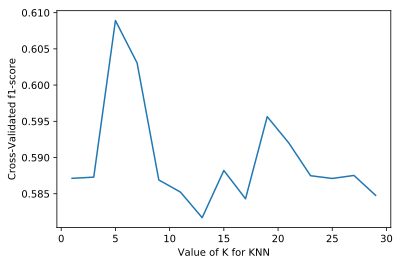

In [133]:
k_range = list(range(1,31,2))
k_f1_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,
                             XS_train_under,
                             y_train_under,
                             cv=folds,
                             scoring='f1',
                             n_jobs=-1)
    k_f1_score.append(scores.mean())

plt.plot(k_range, k_f1_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated f1-score')

Text(0,0.5,'Cross-Validated f1-score')

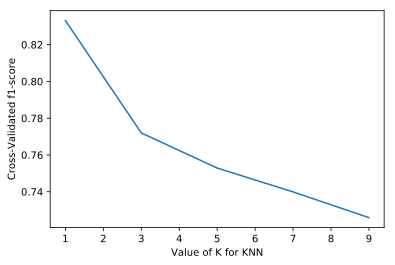

In [134]:
k_range = list(range(1,11,2))
k_f1_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,
                             XS_train_over,
                             y_train_over,
                             cv=folds,
                             scoring='f1',
                             n_jobs=-1)
    k_f1_score.append(scores.mean())

plt.plot(k_range, k_f1_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated f1-score')

Text(0,0.5,'Cross-Validated f1-score')

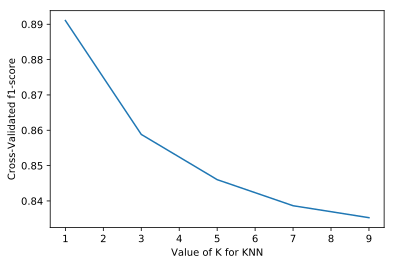

In [135]:
k_range = list(range(1,11,2))
k_f1_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,
                             XS_train_combine,
                             y_train_combine,
                             cv=folds,
                             scoring='f1',
                             n_jobs=-1)
    k_f1_score.append(scores.mean())

plt.plot(k_range, k_f1_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated f1-score')

In [136]:
knn_over = KNeighborsClassifier(n_neighbors=1,n_jobs=-1)
knn_over.fit(XS_train_over, y_train_over)
y_pred = knn_over.predict(XS_test)
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.78      0.78      2227
          1       0.39      0.41      0.40       773

avg / total       0.69      0.68      0.68      3000



In [137]:
knn_under = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knn_under.fit(XS_train_under, y_train_under)
print(metrics.classification_report(y_test, knn_under.predict(XS_test)))

             precision    recall  f1-score   support

          0       0.81      0.70      0.75      2227
          1       0.37      0.52      0.43       773

avg / total       0.69      0.65      0.67      3000



In [138]:
knn_combine = KNeighborsClassifier(n_neighbors=1,n_jobs=-1)
knn_combine.fit(XS_train_combine, y_train_combine)
print(metrics.classification_report(y_test, knn_combine.predict(XS_test)))

             precision    recall  f1-score   support

          0       0.81      0.65      0.72      2227
          1       0.36      0.55      0.43       773

avg / total       0.69      0.63      0.65      3000



Training Data Accuracy: 0.82
Test Data Accuracy:     0.68
[[1729  498]
 [ 459  314]]
             precision    recall  f1-score   support

          0       0.79      0.78      0.78      2227
          1       0.39      0.41      0.40       773

avg / total       0.69      0.68      0.68      3000

ROC_AUC:    0.59


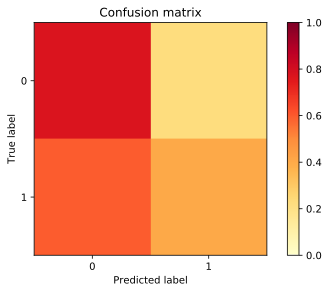

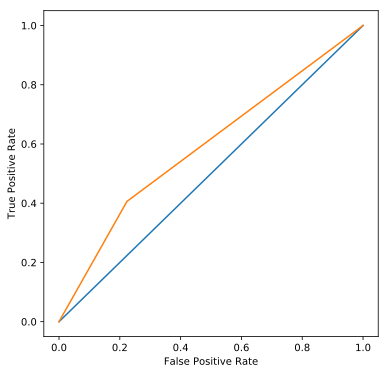

In [139]:
train_score(knn_over,XS_train_over,XS_test,y_train_over,y_test,folds)

Training Data Accuracy: 0.65
Test Data Accuracy:     0.65
[[1549  678]
 [ 374  399]]
             precision    recall  f1-score   support

          0       0.81      0.70      0.75      2227
          1       0.37      0.52      0.43       773

avg / total       0.69      0.65      0.67      3000

ROC_AUC:    0.63


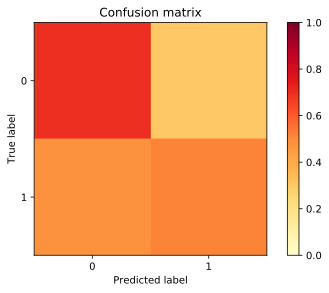

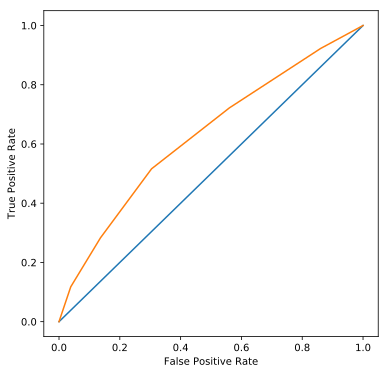

In [140]:
train_score(knn_under,XS_train_under,XS_test,y_train_under,y_test,folds)

Training Data Accuracy: 0.86
Test Data Accuracy:     0.63
[[1449  778]
 [ 344  429]]
             precision    recall  f1-score   support

          0       0.81      0.65      0.72      2227
          1       0.36      0.55      0.43       773

avg / total       0.69      0.63      0.65      3000

ROC_AUC:    0.60


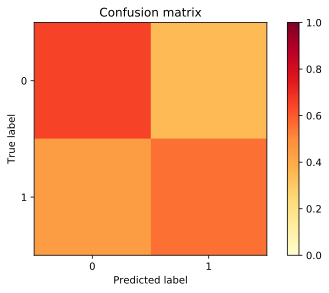

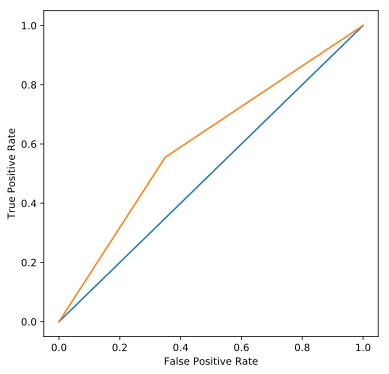

In [141]:
train_score(knn_combine,XS_train_combine,XS_test,y_train_combine,y_test,folds)

In [142]:
from sklearn.model_selection import GridSearchCV

In [64]:
def plot_precision_recall(clf,xtrain,ytrain,xtest,ytest):
    # Plot precision vs recall
    precision = []
    recall = []

    clf.fit(xtrain,ytrain)
    y_true = ytest
    y_org = clf.predict_proba(xtest)
    t = np.arange(0,1,0.01)
    for threshold in t:
        y_pred = []
        for org in y_org:
            if org[1] >= threshold:
                y_pred.append(1)
            else:
                y_pred.append(0)
        precision.append(precision_score(y_true, y_pred))
        recall.append(recall_score(y_true, y_pred))
    plt.figure(figsize=[6,6])
    plt.plot(precision,recall)
    plt.xlabel("precision")
    plt.ylabel("recall")
    plt.xlim(0,1)
    plt.ylim(0,1)

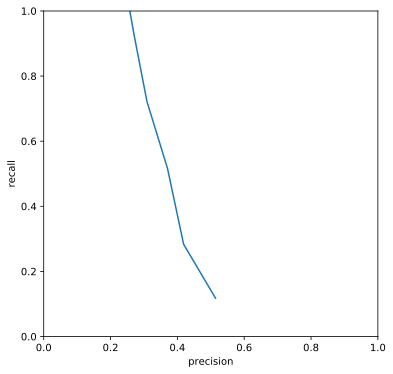

In [145]:
plot_precision_recall(knn_under, XS_train_under, y_train_under, XS_test, y_test)

From the confusion matrix, we could draw the conclusion that KNN model is not a good choice for this classification problem due to low precision and recall.

### Logistic Regression Model

In [146]:
from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression

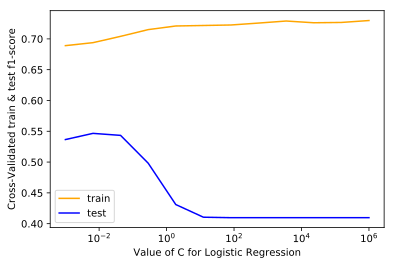

In [147]:
c_values = np.logspace(-3,6, 12)
c_train_score = []
c_test_score = []
for c in c_values:
    log = LogisticRegression(C=c,
                             random_state=42
                            )
    log.fit(XS_train_over,y_train_over)
    scores = cross_val_score(log,
                             XS_train_over,
                             y_train_over,
                             cv=folds,
                             scoring='f1',
                             n_jobs=-1
                            )
    c_train_score.append(scores.mean())
    y_true = y_test
    y_pred = log.predict(XS_test)
    c_test_score.append(metrics.f1_score(y_true,y_pred))

plt.semilogx(c_values,c_train_score,label='train',c='orange')
plt.semilogx(c_values,c_test_score,label='test',c='blue')
plt.xlabel('Value of C for Logistic Regression')
plt.ylabel('Cross-Validated train & test f1-score')
plt.legend()

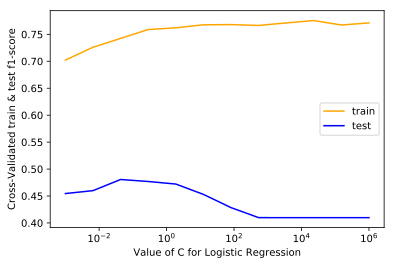

In [160]:
c_values = np.logspace(-3,6, 12)
c_train_score = []
c_test_score = []
for c in c_values:
    log = LogisticRegression(C=c,
                             random_state=42
                            )
    log.fit(XS_train_under,y_train_under)
    scores = cross_val_score(log,
                             XS_train_under,
                             y_train_under,
                             cv=folds,
                             scoring='f1',
                             n_jobs=-1
                            )
    c_train_score.append(scores.mean())
    y_true = y_test
    y_pred = log.predict(XS_test)
    c_test_score.append(metrics.f1_score(y_true,y_pred))

plt.semilogx(c_values,c_train_score,label='train',c='orange')
plt.semilogx(c_values,c_test_score,label='test',c='blue')
plt.xlabel('Value of C for Logistic Regression')
plt.ylabel('Cross-Validated train & test f1-score')
plt.legend()

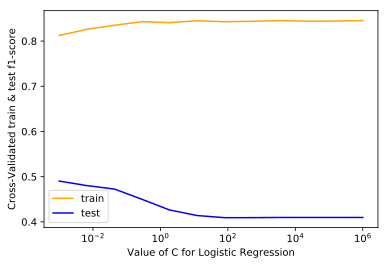

In [161]:
c_values = np.logspace(-3,6, 12)
c_train_score = []
c_test_score = []
for c in c_values:
    log = LogisticRegression(C=c,
                             random_state=42
                            )
    log.fit(XS_train_combine,y_train_combine)
    scores = cross_val_score(log,
                             XS_train_combine,
                             y_train_combine,
                             cv=folds,
                             scoring='f1',
                             n_jobs=-1
                            )
    c_train_score.append(scores.mean())
    y_true = y_test
    y_pred = log.predict(XS_test)
    c_test_score.append(metrics.f1_score(y_true,y_pred))

plt.semilogx(c_values,c_train_score,label='train',c='orange')
plt.semilogx(c_values,c_test_score,label='test',c='blue')
plt.xlabel('Value of C for Logistic Regression')
plt.ylabel('Cross-Validated train & test f1-score')
plt.legend()

In [155]:
log = LogisticRegression(C=1e-1, random_state=42)

Training Data Accuracy: 0.74
Test Data Accuracy:     0.60
[[1145 1082]
 [ 103  670]]
             precision    recall  f1-score   support

          0       0.92      0.51      0.66      2227
          1       0.38      0.87      0.53       773

avg / total       0.78      0.60      0.63      3000

ROC_AUC:    0.80


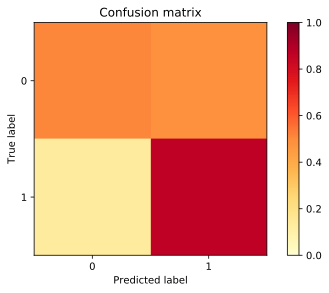

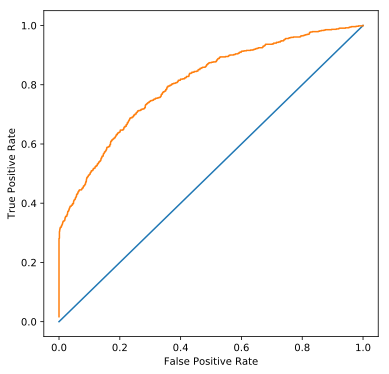

In [156]:
train_score(log,XS_train_over,XS_test,y_train_over,y_test,folds)

Training Data Accuracy: 0.77
Test Data Accuracy:     0.61
[[1307  920]
 [ 241  532]]
             precision    recall  f1-score   support

          0       0.84      0.59      0.69      2227
          1       0.37      0.69      0.48       773

avg / total       0.72      0.61      0.64      3000

ROC_AUC:    0.69


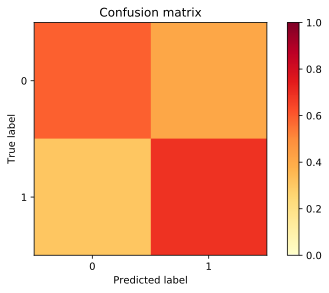

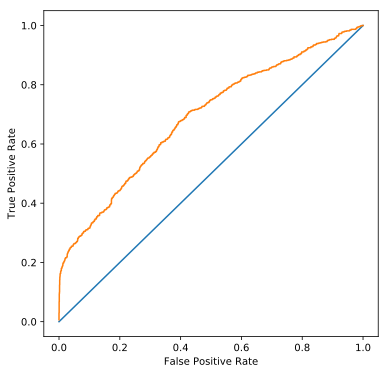

In [157]:
train_score(log,XS_train_under,XS_test,y_train_under,y_test,folds)

Training Data Accuracy: 0.79
Test Data Accuracy:     0.45
[[ 614 1613]
 [  45  728]]
             precision    recall  f1-score   support

          0       0.93      0.28      0.43      2227
          1       0.31      0.94      0.47       773

avg / total       0.77      0.45      0.44      3000

ROC_AUC:    0.78


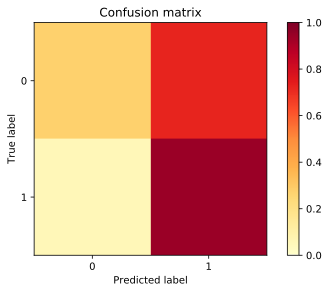

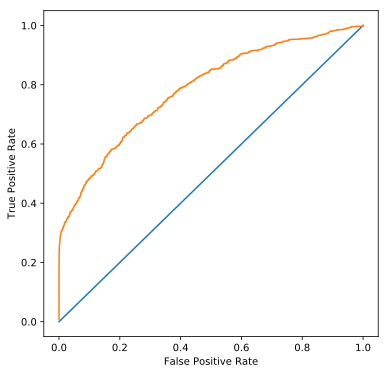

In [158]:
train_score(log,XS_train_combine,XS_test,y_train_combine,y_test,folds)

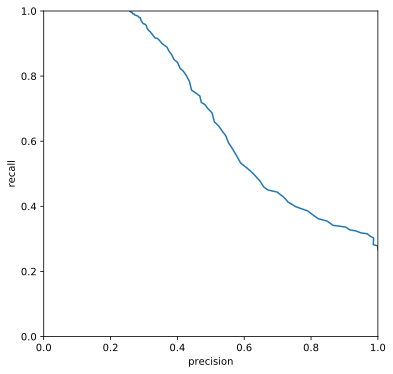

In [159]:
plot_precision_recall(log,XS_train_over,y_train_over,XS_test,y_test)

#### Based on the confusion matrix, we can see logistic regression model cannot predict bad loans well due to low precision score.

### Supporting Vector Machine Model

In [162]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [163]:
# Weighted prediction feature
y0 = len(y_train[y_train==0])/len(y_train)
y1 = 1 - y0
weight = {0:y0, 1:y1}

In [164]:
svc = svm.SVC(kernel='linear',
              probability=True,
              class_weight=weight,
              random_state=25
             )

In [ ]:
train_score(svc,XS_train_under,XS_test,y_train_under,y_test,folds)

In [ ]:
plot_precision_recall(svc,XS_train_under,y_train_under,XS_test,y_test)

In [167]:
# fit rbf model
svc2 = svm.SVC(
               probability=True,
               class_weight = weight,
               random_state = 25
              ) #Gamma is the free parameter of the Gaussian radial basis function.

In [168]:
c_values = np.logspace(-3,6, 12)
kernel = ['poly','rbf','sigmoid']
gamma = ['auto',0.001,0.002,0.005,0.01]
param_grid = dict(kernel=kernel, 
                  degree=degree, 
                  gamma=gamma,
                  C=c_values)

In [169]:
# instantiate and fit the grid
grid = GridSearchCV(svc2, param_grid, cv=folds, scoring='roc_auc',n_jobs=-1)
grid.fit(XS_train_under, y_train_under)

KeyboardInterrupt: 

In [170]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [171]:
svc3 = svm.SVC(C=3511.1917,
               gamma = 0.001,
               kernel = 'rbf',
               class_weight = weight,
               random_state = 42,
               probability = True
              )

Training Data Accuracy: 0.76
Test Data Accuracy:     0.62
[[1329  898]
 [ 246  527]]
             precision    recall  f1-score   support

          0       0.84      0.60      0.70      2227
          1       0.37      0.68      0.48       773

avg / total       0.72      0.62      0.64      3000

ROC_AUC:    0.71


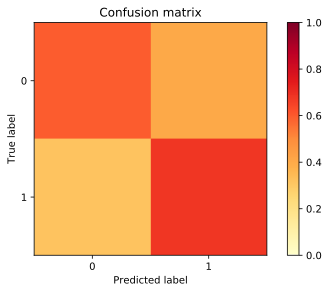

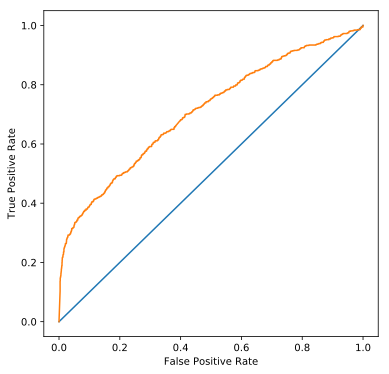

In [172]:
train_score(svc3,XS_train_under,XS_test,y_train_under,y_test,folds)

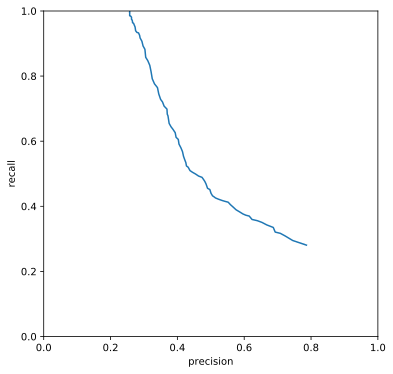

In [173]:
plot_precision_recall(svc3,XS_train_under,y_train_under,XS_test,y_test)

### Trees

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

#### Decision Tree

In [180]:
dec = DecisionTreeClassifier(max_depth=14, min_samples_leaf=6, random_state=42,class_weight=weight)

In [177]:
depth = list(range(1,25))
leaf = [1,3,6,10]
param_grid = dict(max_depth=depth, min_samples_leaf=leaf)

In [178]:
# instantiate and fit the grid
grid = GridSearchCV(dec, param_grid, cv=folds, scoring='f1',n_jobs=-1)
grid.fit(X_train_over, y_train_over)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight={0: 0.7307142857142858, 1: 0.26928571428571424},
            criterion='gini', max_depth=25, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'min_samples_leaf': [1, 3, 6, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [179]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.819182478485
{'max_depth': 14, 'min_samples_leaf': 6}
DecisionTreeClassifier(class_weight={0: 0.7307142857142858, 1: 0.26928571428571424},
            criterion='gini', max_depth=14, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=6,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')


Training Data Accuracy: 0.84
Test Data Accuracy:     0.81
[[2120  107]
 [ 456  317]]
             precision    recall  f1-score   support

          0       0.82      0.95      0.88      2227
          1       0.75      0.41      0.53       773

avg / total       0.80      0.81      0.79      3000

ROC_AUC:    0.73


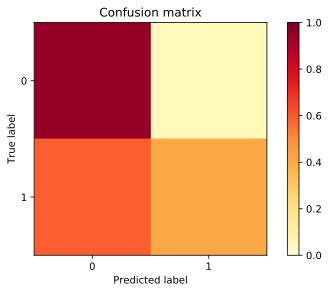

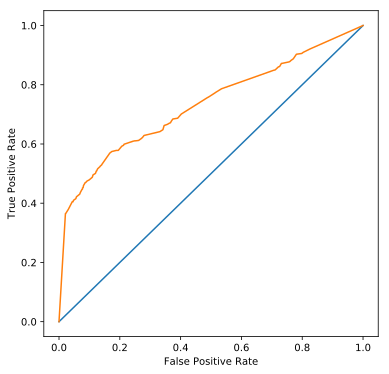

In [181]:
train_score(dec,X_train_over,X_test,y_train_over,y_test,folds)

Training Data Accuracy: 0.77
Test Data Accuracy:     0.56
[[1183 1044]
 [ 269  504]]
             precision    recall  f1-score   support

          0       0.81      0.53      0.64      2227
          1       0.33      0.65      0.43       773

avg / total       0.69      0.56      0.59      3000

ROC_AUC:    0.60


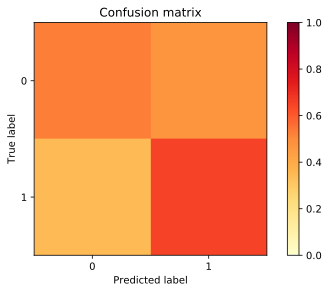

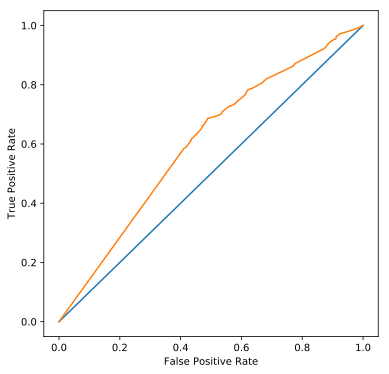

In [182]:
train_score(dec,X_train_under,X_test,y_train_under,y_test,folds)

Training Data Accuracy: 0.84
Test Data Accuracy:     0.78
[[1939  288]
 [ 386  387]]
             precision    recall  f1-score   support

          0       0.83      0.87      0.85      2227
          1       0.57      0.50      0.53       773

avg / total       0.77      0.78      0.77      3000

ROC_AUC:    0.74


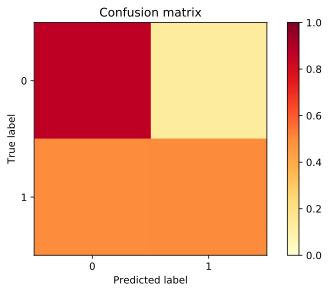

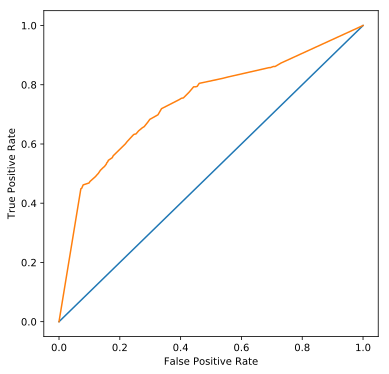

In [183]:
train_score(dec,X_train_combine,X_test,y_train_combine,y_test,folds)

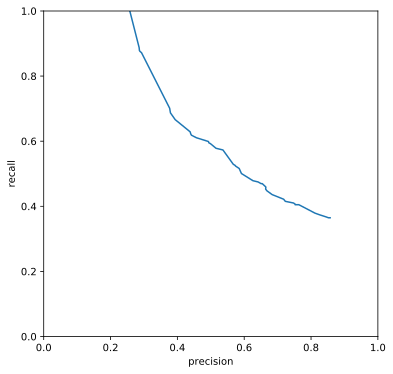

In [184]:
plot_precision_recall(dec,X_train_over,y_train_over,X_test,y_test)

In [ ]:
dec.feature_importances_

In [192]:
n_estimators = [10,20,50,100,200,500]
param_grid = dict(n_estimators=n_estimators)

In [198]:
ran = RandomForestClassifier(random_state=42,
                             class_weight=weight,
                             max_depth=14,
                             min_samples_leaf=6,
                             n_estimators=20,
                             n_jobs=-1)

In [196]:
grid = GridSearchCV(ran, param_grid, cv=folds, scoring="f1",n_jobs=-1)
grid.fit(X_train_over,y_train_over)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True,
            class_weight={0: 0.7307142857142858, 1: 0.26928571428571424},
            criterion='gini', max_depth=14, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=6,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [197]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.832814424194
{'n_estimators': 20}
RandomForestClassifier(bootstrap=True,
            class_weight={0: 0.7307142857142858, 1: 0.26928571428571424},
            criterion='gini', max_depth=14, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=6,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)


In [199]:
ran = grid.best_estimator_

Training Data Accuracy: 0.86
Test Data Accuracy:     0.82
[[2225    2]
 [ 526  247]]
             precision    recall  f1-score   support

          0       0.81      1.00      0.89      2227
          1       0.99      0.32      0.48       773

avg / total       0.86      0.82      0.79      3000

ROC_AUC:    0.79


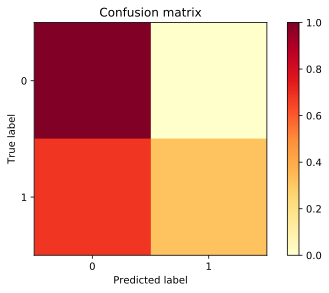

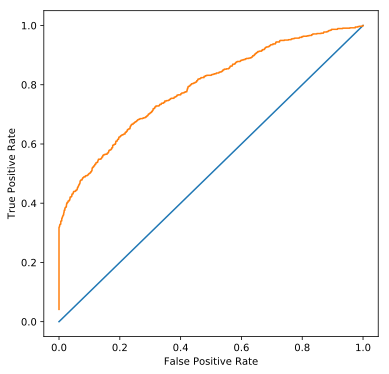

In [200]:
train_score(ran,X_train_over,X_test,y_train_over,y_test,folds)

Training Data Accuracy: 0.87
Test Data Accuracy:     0.82
[[2133   94]
 [ 456  317]]
             precision    recall  f1-score   support

          0       0.82      0.96      0.89      2227
          1       0.77      0.41      0.54       773

avg / total       0.81      0.82      0.80      3000

ROC_AUC:    0.78


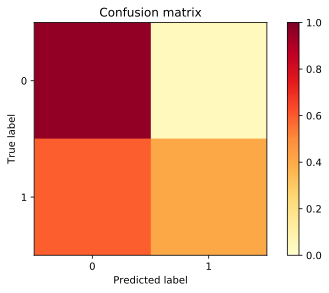

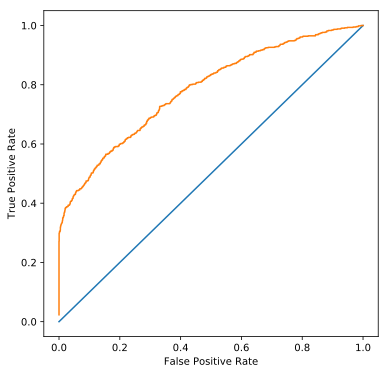

In [201]:
train_score(ran,X_train_combine,X_test,y_train_combine,y_test,folds)

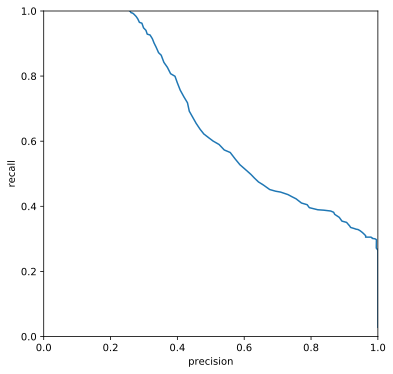

In [202]:
plot_precision_recall(ran,X_train_combine,y_train_combine,X_test,y_test)

In [ ]:
ran.feature_importances_

In [66]:
grad = GradientBoostingClassifier(random_state=42,n_estimators=20)

Training Data Accuracy: 0.84
Test Data Accuracy:     0.82
[[2227    0]
 [ 526  247]]
             precision    recall  f1-score   support

          0       0.81      1.00      0.89      2227
          1       1.00      0.32      0.48       773

avg / total       0.86      0.82      0.79      3000

ROC_AUC:    0.79


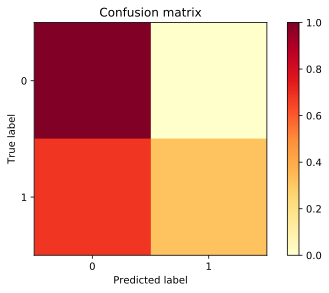

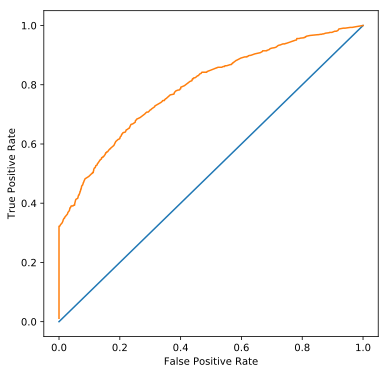

In [204]:
train_score(grad,X_train_over,X_test,y_train_over,y_test,folds)

Training Data Accuracy: 0.85
Test Data Accuracy:     0.72
[[1641  586]
 [ 250  523]]
             precision    recall  f1-score   support

          0       0.87      0.74      0.80      2227
          1       0.47      0.68      0.56       773

avg / total       0.77      0.72      0.73      3000

ROC_AUC:    0.79


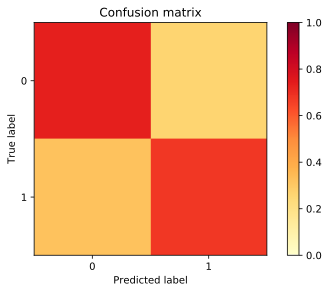

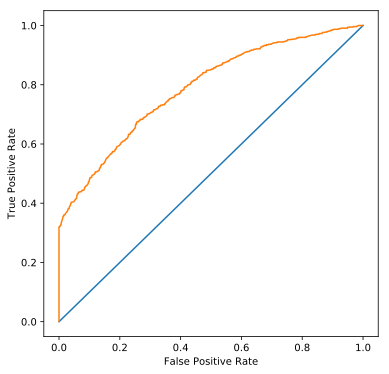

In [67]:
train_score(grad,X_train_combine,X_test,y_train_combine,y_test,folds)

/Users/liuriguang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/liuriguang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/liuriguang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/liuriguang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


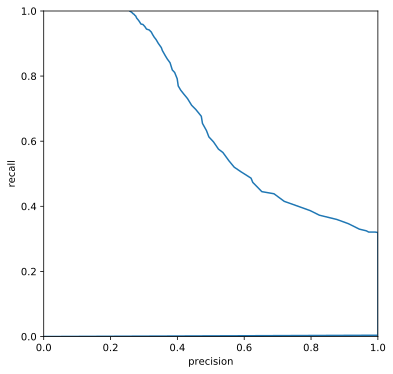

In [68]:
plot_precision_recall(grad,X_train_combine,y_train_combine,X_test,y_test)

### Feature importance analysis

In [214]:
grad.fit(X_train_combine,y_train_combine)
grad.feature_importances_

array([0.000742, 0.019765, 0.056392, 0.065208, 0.002131, 0.000000,
       0.000000, 0.000000, 0.000000, 0.002006, 0.000000, 0.352785,
       0.000000, 0.000000, 0.000000, 0.000000, 0.007659, 0.004323,
       0.000000, 0.000000, 0.000000, 0.050823, 0.071786, 0.068829,
       0.092551, 0.005476, 0.033558, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000442, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.011476, 0.000000, 0.000000,
       0.053163, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.027971,
       0.072914, 0.000000, 0.000000, 0.000000, 0.000000, 0.000

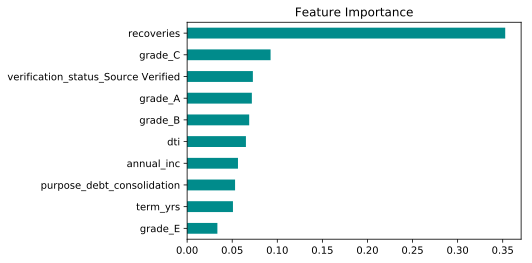

In [215]:
(pd.Series(grad.feature_importances_, index=X.columns)
   .nlargest(10)
   .iloc[::-1]
   .plot(kind='barh',title="Feature Importance",color='darkcyan'));      # some method chaining, because it's sexy!

### Cost Minimization

In [69]:
def makecost(obs,prob,falsepos_cost,falseneg_cost):
    def cost(cutoff):
        pred = np.array(prob > cutoff)
        fpos = pred * (1 - obs) 
        fneg = (1 - pred) * obs
        return np.sum(fpos * falsepos_cost + fneg * falseneg_cost)
    return np.vectorize(cost)

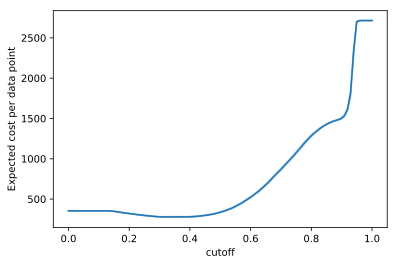

In [73]:
cut = np.linspace(0,1,100)
cost = np.zeros_like(cut)
from sklearn.model_selection import KFold, cross_val_predict
obs = np.ravel(y_train_combine)

K = 20
for j in range(K):
    folds = KFold(n_splits=5,shuffle=True)
    prob = cross_val_predict(grad,X_train_combine,np.ravel(y_train_combine),cv=folds,method='predict_proba',n_jobs=5)[:,1]
    getcost = makecost(obs,prob,falsepos_cost=1902,falseneg_cost=8509)
    currentcost = getcost(cut)/X.shape[0]
    cost += currentcost
    plt.plot(cut, currentcost,c='C0',alpha=0.05)
cost /= K
plt.plot(cut,cost,c='C0')
plt.xlabel('cutoff')
plt.ylabel('Expected cost per data point');

In [74]:
bestcut = cut[np.argmin(cost)]
bestcut

0.31313131313131315

             precision    recall  f1-score   support

          0       0.93      0.32      0.47      2227
          1       0.32      0.93      0.48       773

avg / total       0.77      0.48      0.48      3000



3247753

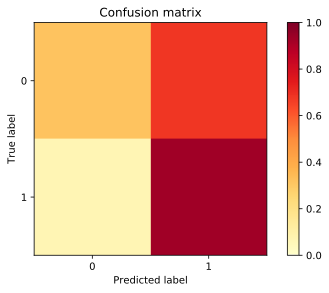

In [75]:
grad.fit(X_train_combine, y_train_combine)
y_proba = grad.predict_proba(X_test)[:,1]
y_cutoff = len(y_proba) * [bestcut]
y_pred = np.where(y_proba > y_cutoff,1,0)
y_true = y_test
cm = confusion_matrix(y_true,y_pred)
gain = cm[1][1]*8509 - cm[0][1]*1902
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm)
print(classification_report(y_true, y_pred))
gain

### Naive Bayasian

In [207]:
from sklearn import naive_bayes

In [208]:
nb = naive_bayes.GaussianNB()

Training Data Accuracy: 0.70
Test Data Accuracy:     0.82
[[2208   19]
 [ 532  241]]
             precision    recall  f1-score   support

          0       0.81      0.99      0.89      2227
          1       0.93      0.31      0.47       773

avg / total       0.84      0.82      0.78      3000

ROC_AUC:    0.74


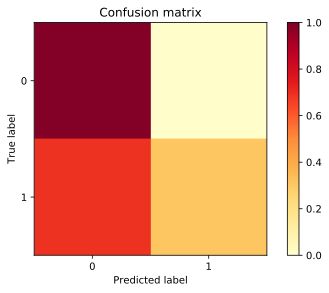

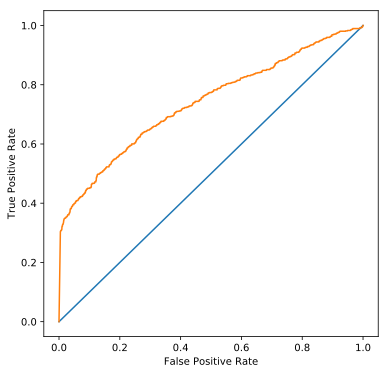

In [209]:
train_score(nb,X_train_over,X_test,y_train_over,y_test,folds)

#### I choose to use gradient boosting model since it has the best f1-score and roc_auc score.

In [240]:
import pickle

pickle.dump(grad, open('model.pkl', 'wb'))